## Regression Model in Keras

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import keras

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Reading Data

In [ ]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### X and Y Extraction

In [ ]:
##target = df['Strength'] # Strength column
##predictors = df.iloc[:,:-1] # all columns except Strength

#predictors
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag','Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash','Water  (component 4)(kg in a m^3 mixture)':'Water','Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer','Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse aggregate','Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine aggregate','Age (day)':'Age', 'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'}, inplace=True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,coarse aggregate,Fine aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
target = df.iloc[:, -1] # Strength column
predictors = df.iloc[:,:-1] # all columns except Strength

predictors

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,coarse aggregate,Fine aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


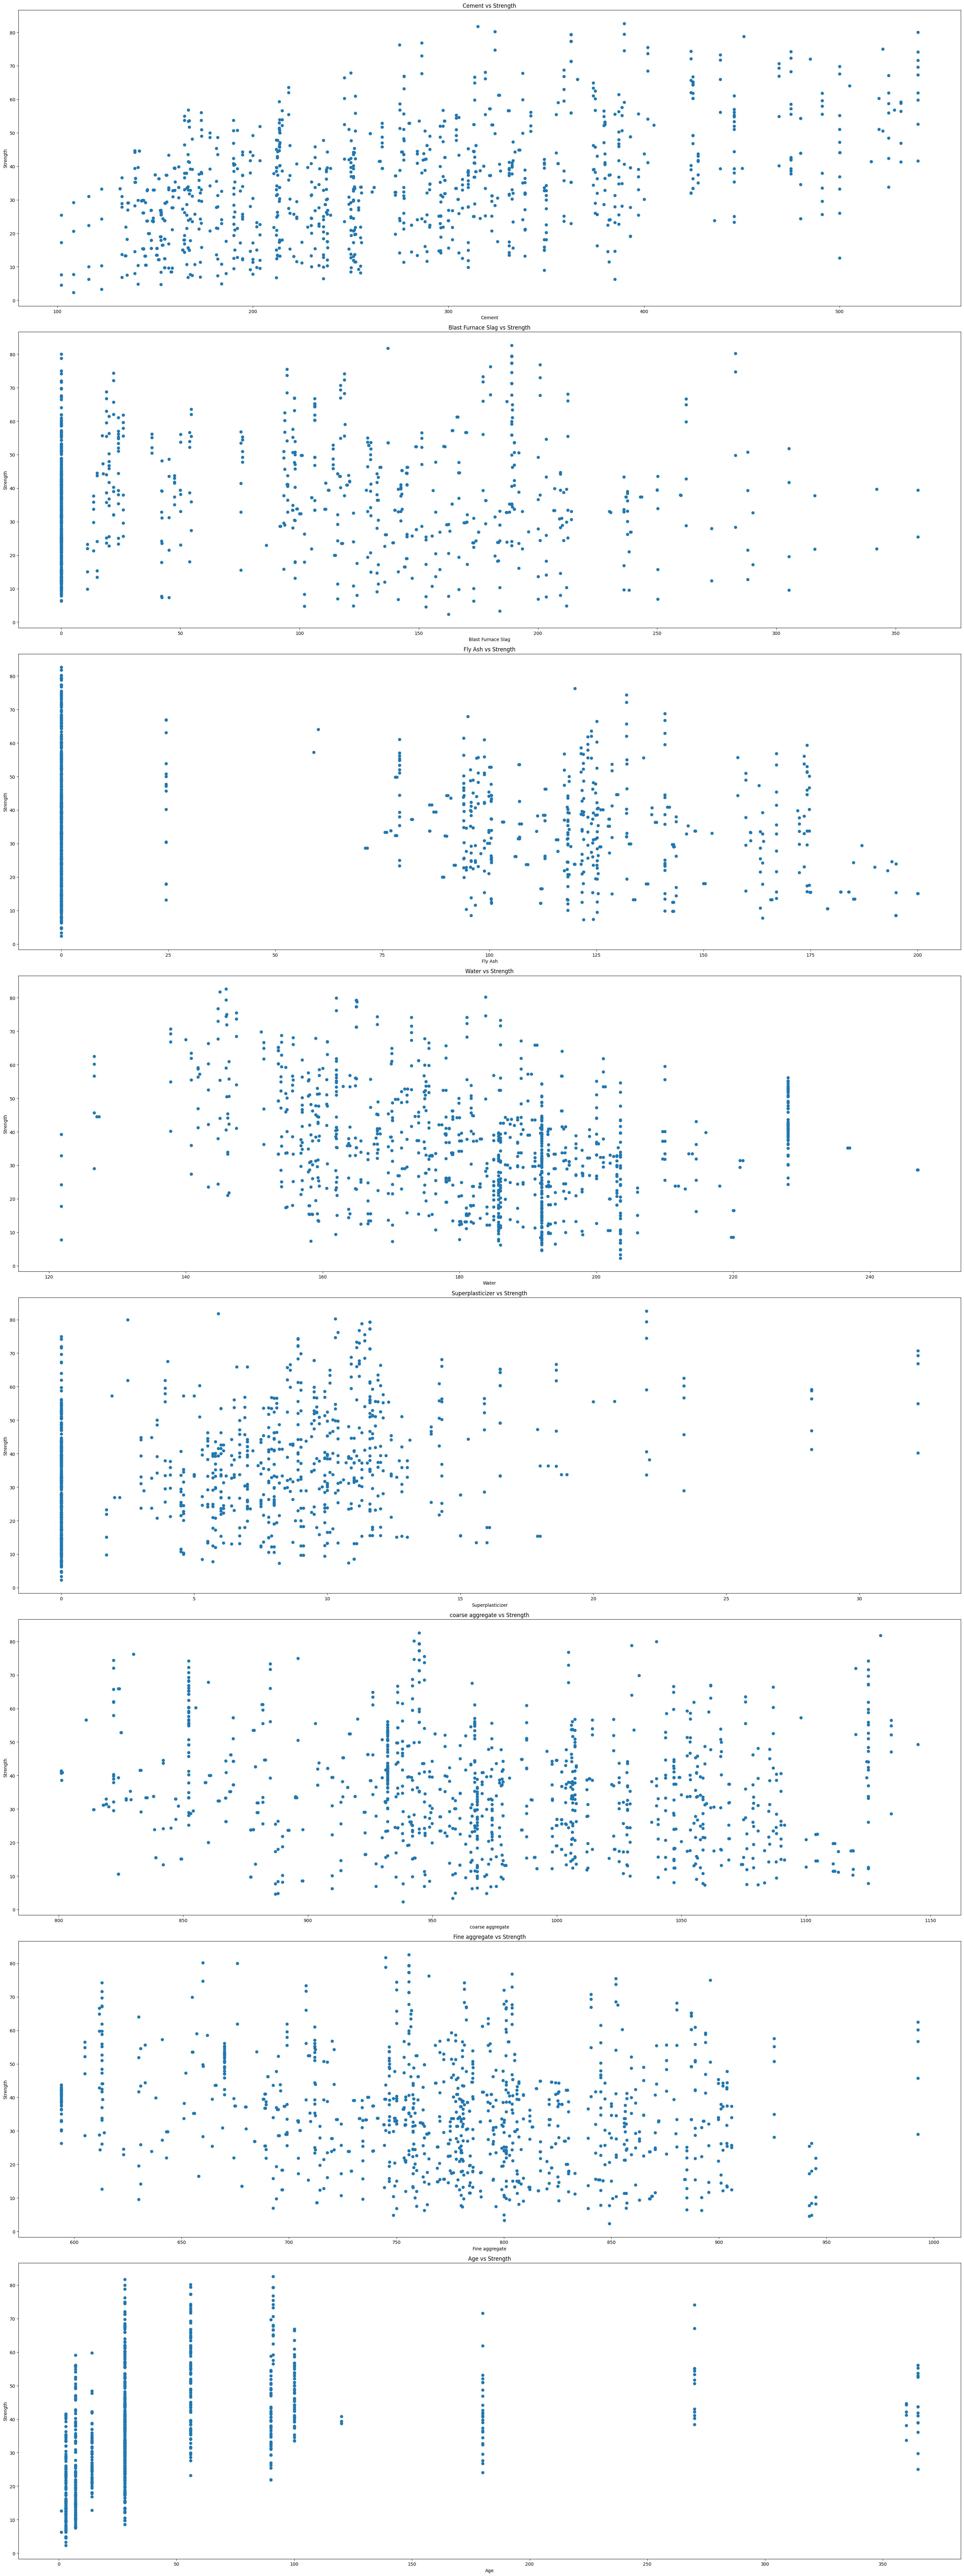

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 80))
for i, feature in enumerate(predictors.columns):
    plt.subplot(len(predictors.columns), 1, i + 1)
    plt.scatter(predictors[feature], target)
    plt.xlabel(feature)
    plt.ylabel('Strength')
    plt.title(f'{feature} vs Strength')

plt.tight_layout()
plt.show()

In [ ]:
(predictors == 0).sum(axis=0)

Cement                  0
Blast Furnace Slag    471
Fly Ash               566
Water                   0
Superplasticizer      379
coarse aggregate        0
Fine aggregate          0
Age                     0
dtype: int64

## Normalization

In [ ]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,coarse aggregate,Fine aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


### Spliting to Train and Test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(predictors,target, test_size =
0.4 , random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size
= 0.5 , random_state=42)

print("X_train : " ,X_train.shape)
print("y_train : " ,y_train.shape)
print("X_Test : " ,X_val.shape)
print("y_test : " ,y_val.shape)
print("X_Test : " ,X_test.shape)
print("y_test : " ,y_test.shape)

X_train :  (618, 8)
y_train :  (618,)
X_Test :  (206, 8)
y_test :  (206,)
X_Test :  (206, 8)
y_test :  (206,)


In [ ]:

from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creating Model

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])



### Model Training

### Evaluate the model

In [ ]:
#from tf.keras.metrics import R2Score

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001,weight_decay=0.05), loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, verbose=0)



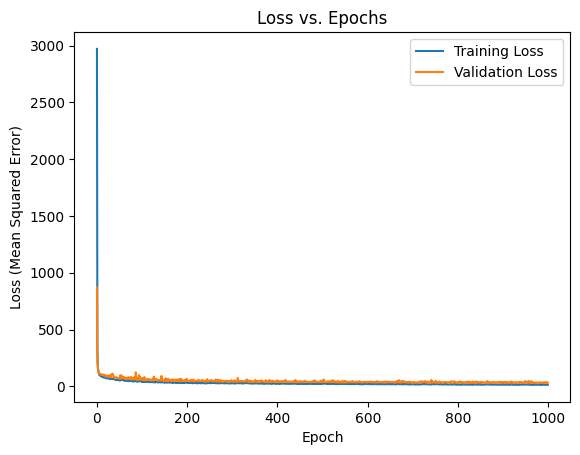

In [ ]:
# Plot the loss vs. epochs for both training and validation sets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [ ]:
# for 1000 epochs
from sklearn.metrics import r2_score
y_pred_train = model.predict(X_train)
r2score_train = r2_score(y_train, y_pred_train)
print(r2score_train)

y_pred_val = model.predict(X_val)
r2score_val = r2_score(y_val, y_pred_val)
print(r2score_val)

y_pred_test = model.predict(X_test)
r2score_test = r2_score(y_test, y_pred_test)
print(r2score_test)

20/20 [==============================] - 0s 2ms/step
0.9447425550280711
7/7 [==============================] - 0s 2ms/step
0.8883189256499849
7/7 [==============================] - 0s 3ms/step
0.9133568921622814


In [ ]:
train_loss, train_r2score = model.evaluate(X_train, y_train)
print("Training r2score:",  train_r2score )

# Evaluate the model on validation data
val_loss, val_r2score = model.evaluate(X_val, y_val)
print("Validation r2score:",val_r2score)

20/20 [==============================] - 0s 3ms/step - loss: 14.7612 - r2_score: 0.9447
Training r2score: 0.9447425007820129
7/7 [==============================] - 0s 5ms/step - loss: 32.5588 - r2_score: 0.8883
Validation r2score: 0.8883188962936401


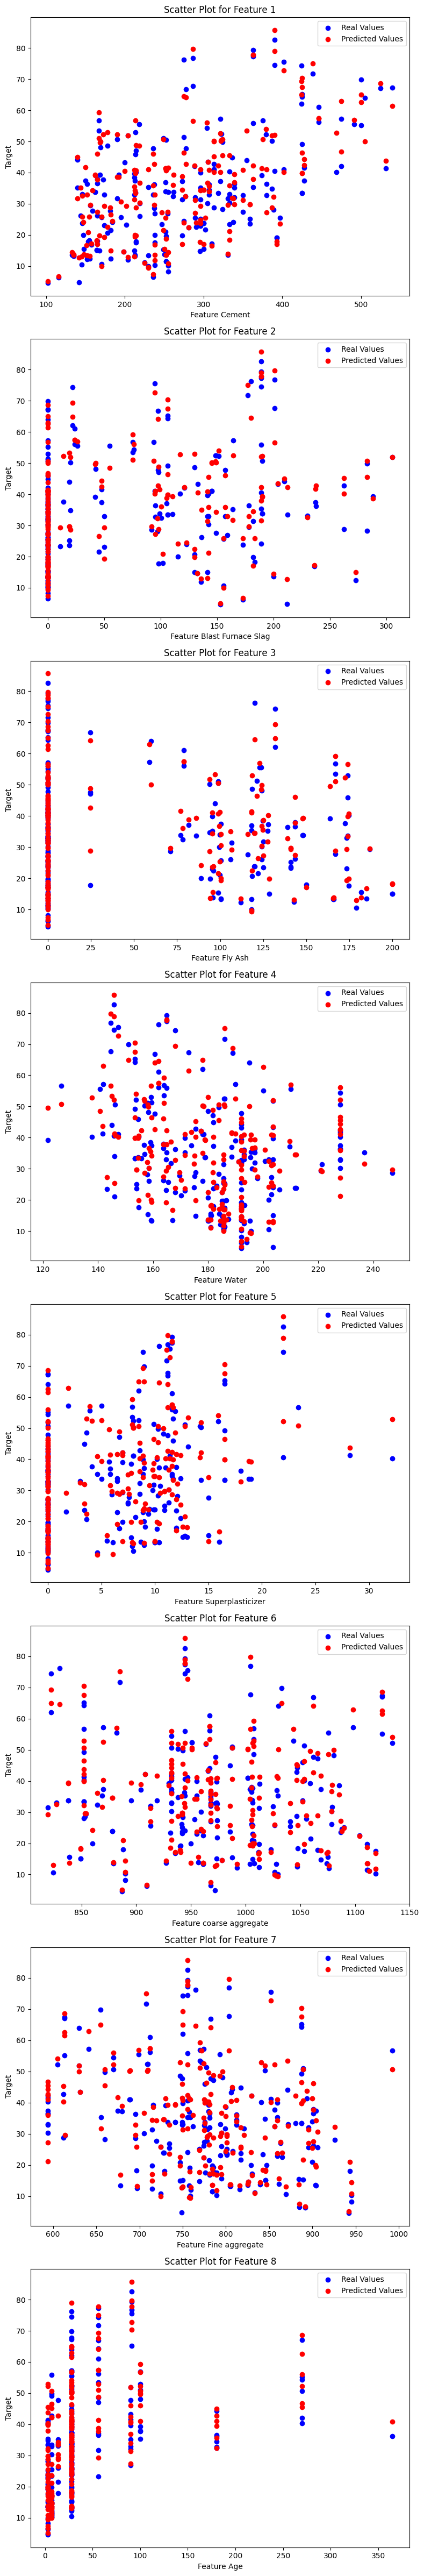

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(8, 6 * 8))
for i in range(0,8):
    axs[i].scatter(X_test.iloc[:, i], y_test, color='blue', label='Real Values')
    axs[i].scatter(X_test.iloc[:, i], y_pred_test, color='red', label='Predicted Values')
    axs[i].set_xlabel(f'Feature {predictors.columns[i]}')
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'Scatter Plot for Feature {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

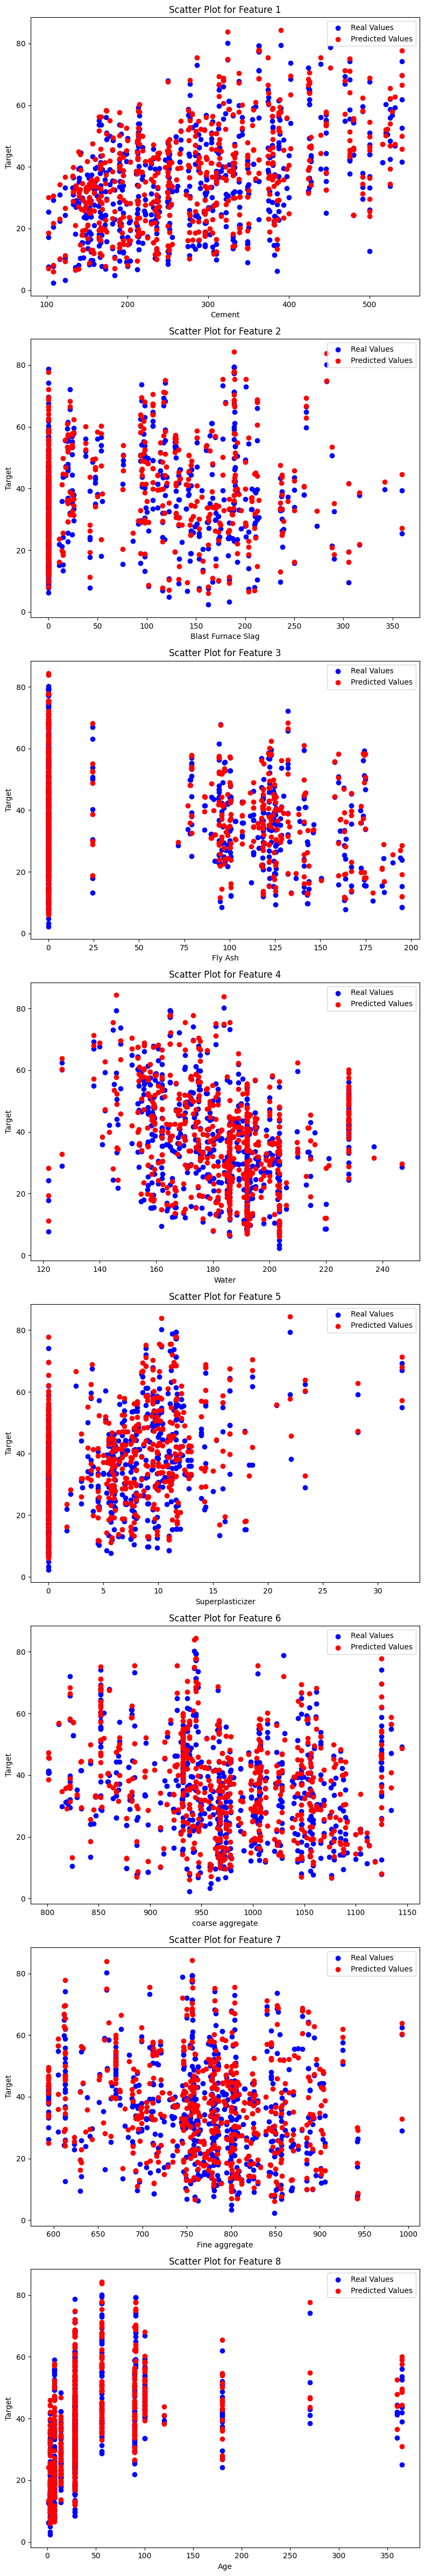

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(8, 6 * 8))
for i in range(0,4):
    axs[i].scatter(X_train.iloc[:, i], y_train, color='blue', label='Real Values')
    axs[i].scatter(X_train.iloc[:, i], y_pred_train, color='red', label='Predicted Values')
    axs[i].set_xlabel(f'{predictors.columns[i]}')
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'Scatter Plot for Feature {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

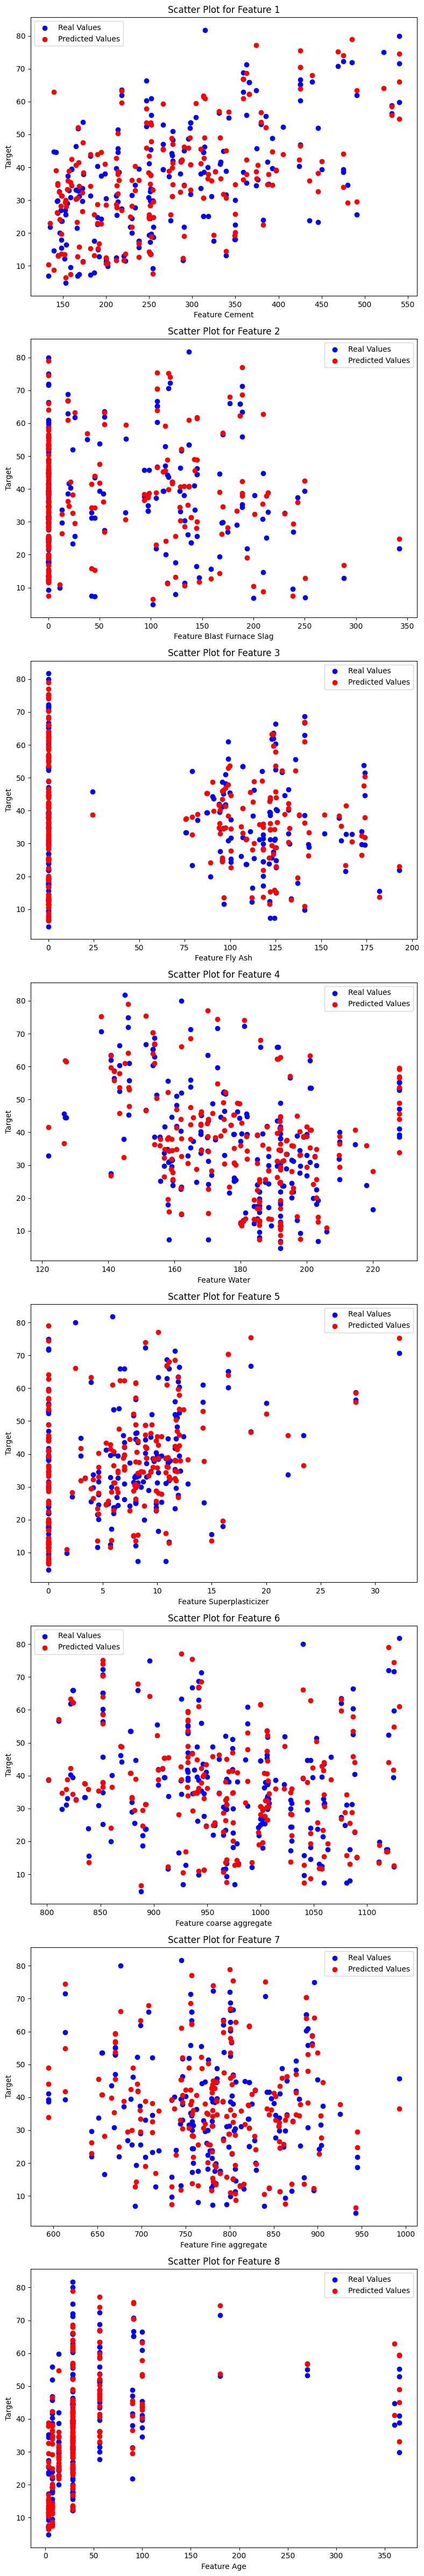

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(8, 6 * 8))
for i in range(0,8):
    axs[i].scatter(X_val.iloc[:, i], y_val, color='blue', label='Real Values')
    axs[i].scatter(X_val.iloc[:, i], y_pred_val, color='red', label='Predicted Values')
    axs[i].set_xlabel(f'Feature {predictors.columns[i]}')
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'Scatter Plot for Feature {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
'''
learning_rates = []
mse_train = []
mse_test = []
for i in range(0,5):
  r=-4*np.random.rand()
  l_rate=pow(10,r)
  learning_rates.append(l_rate)
  model.compile( optimizer=keras.optimizers.Adam(learning_rate=l_rate) , loss='mean_squared_error' , metrics=['accuracy'])
  model.fit(X_train , y_train , epochs=50)
  pred_test= model.predict(X_test)
  pred_train= model.predict(X_train)
  mean_squared_err_train = mean_squared_error(y_train,pred_train)
  mean_squared_err_test = mean_squared_error(y_test,pred_test)

  mse_train.append(mean_squared_err_train)
  mse_test.append(mean_squared_err_test)

#mean = np.mean(mean_squared_err)
##std_dev = np.std(mean_squared_err)
#print("MeanSquaredError : ", mean_squared_err,"Mean : ", mean , " And Standard Deviation :", std_dev)
#print("for learning rate= ",l_rate," ->MeanSquaredError_train : ", mean_squared_err_train," MeanSquaredError_test : ", mean_squared_err_test)
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.plot(learning_rates, mse_train, marker='o')
plt.xscale('log')
plt.title('Learning Rate vs Mean Squared Error (Train)')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot for testing data
plt.subplot(1, 2, 2)
plt.plot(learning_rates, mse_test, marker='o')
plt.xscale('log')
plt.title('Learning Rate vs Mean Squared Error (Test)')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()
###
'''

'\nlearning_rates = []\nmse_train = []\nmse_test = []\nfor i in range(0,5):\n  r=-4*np.random.rand()\n  l_rate=pow(10,r)\n  learning_rates.append(l_rate)\n  model.compile( optimizer=keras.optimizers.Adam(learning_rate=l_rate) , loss=\'mean_squared_error\' , metrics=[\'accuracy\'])\n  model.fit(X_train , y_train , epochs=50)\n  pred_test= model.predict(X_test)\n  pred_train= model.predict(X_train)\n  mean_squared_err_train = mean_squared_error(y_train,pred_train)\n  mean_squared_err_test = mean_squared_error(y_test,pred_test)\n\n  mse_train.append(mean_squared_err_train)\n  mse_test.append(mean_squared_err_test)\n\n#mean = np.mean(mean_squared_err)\n##std_dev = np.std(mean_squared_err)\n#print("MeanSquaredError : ", mean_squared_err,"Mean : ", mean , " And Standard Deviation :", std_dev)\n#print("for learning rate= ",l_rate," ->MeanSquaredError_train : ", mean_squared_err_train," MeanSquaredError_test : ", mean_squared_err_test)\nplt.figure(figsize=(12, 6))\n\n# Plot for training data\n

In [ ]:
'''min_index_train = np.argmin(mse_train)
min_index_test= np.argmin(mse_test)


print("Index of the minimum value:", min_index_train," ", min_index_train)


SyntaxError: incomplete input (<ipython-input-78-3003805fe66b>, line 1)

In [ ]:
final_l_rate=learning_rates[min_index_train]

In [ ]:
model.compile( optimizer=keras.optimizers.Adam(learning_rate=final_l_rate) , loss='mean_squared_error' , metrics=['accuracy'])
model.fit(X_train , y_train , epochs=100)
pred_test= model.predict(X_test)
pred_train= model.predict(X_train)
mean_squared_err_train = mean_squared_error(y_train,pred_train)
mean_squared_err_test = mean_squared_error(y_test,pred_test)
print("for learning rate= ",final_l_rate," ->MeanSquaredError_train : ", mean_squared_err_train," MeanSquaredError_test : ", mean_squared_err_test)

In [ ]:
#pred_test= model.predict(X_test)
#pred_train= model.predict(X_train)
#mean_squared_err_train = mean_squared_error(y_train,pred_train)
#mean_squared_err_test = mean_squared_error(y_test,pred_test)

#mean = np.mean(mean_squared_err)
##std_dev = np.std(mean_squared_err)
#print("MeanSquaredError : ", mean_squared_err,"Mean : ", mean , " And Standard Deviation :", std_dev)
#print("MeanSquaredError_train : ", mean_squared_err_train," MeanSquaredError_test : ", mean_squared_err_test)


### create a list of 50 mean squared errors

In [ ]:
'''epochs_number = 100
mean_sq_errs = []
number_of_reapeat = 50

for i in range(20,number_of_reapeat):
    X_train , X_test , y_train , y_test = train_test_split(predictors , target , test_size=0.3 ,random_state=i)
    model.fit(X_train , y_train , epochs=epochs_number , verbose=0)

    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))

    y_pred= model.predict(X_test)
    mean_squared_err = mean_squared_error(y_test,y_pred)
    mean_sq_errs.append(mean_squared_err)


mean_sq_errs_arr = np.array(mean_sq_errs)
mean = np.mean(mean_sq_errs_arr)
std_dev = np.std(mean_sq_errs_arr)
min_mse = np.min(mean_sq_errs)
min_index_mse = np.argmin(mean_sq_errs)


print("Mean: "+ str(mean))
print("Standard Deviation: "+str(std_dev))
print("MSE: ",min_mse," for random state=",min_index_mse)


In [ ]:
'''mean_sq_errs[26]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(predictors , target , test_size=0.3 ,random_state=20+min_index_mse)


'''model.compile( optimizer=keras.optimizers.Adam(learning_rate=final_l_rate) , loss='mean_squared_error' , metrics=['accuracy'])
model.fit(X_train , y_train , epochs=100)
pred_test= model.predict(X_test)
pred_train= model.predict(X_train)
mean_squared_err_train = mean_squared_error(y_train,pred_train)
mean_squared_err_test = mean_squared_error(y_test,pred_test)
print("for learning rate= ",final_l_rate," ->MeanSquaredError_train : ", mean_squared_err_train," MeanSquaredError_test : ", mean_squared_err_test)

In [ ]:
predictions = model.predict(X_test)
#real_pred_value=predictions*predictions.std()+ predictions.mean()
sample_value=predictions[20:25]
print("Predicted values are: ",sample_value )
print("Real values are: ", y_test[20:25])

7/7 [==============================] - 0s 2ms/step
Predicted values are:  [[39.359367]
 [70.39159 ]
 [23.705908]
 [40.67289 ]
 [24.850018]]
Real values are:  987    33.76
172    65.20
309    22.95
326    50.60
739    25.18
Name: Concrete compressive strength, dtype: float64
